# Health data analysis
Olivier: 
I just downloaded a zip of the repository (https://github.com/oliviermirat/MonsterMizer), then after unzipping, I navigated (in a python command prompt) to the folder "firstExperimentsAndCode" and typed: "python 1_createDataFrame.py". This generated a file called "data.txt" (that I've also attached to this email), that contains the pandas structure with all the data. This data can then be read with the following code:

import pickle
input = open('data.txt', 'rb')
data = pickle.load(input)
input.close()

The data is then in the variable data, as you'll see this data contains plenty of non-zero data (there is quite a bit of zero values at the beginning and end of the array but plenty of non-zeros values in the middle).
Alternatively, you can also view this data by using for example the scripts "2_analyzeDataKnee.py", "2_analyzeDataForeheadEyes", etc...



# Load data 



In [14]:
import pickle
import numpy as np
import csv
import datetime
import pandas as pd
import os, os.path
import re

# Creation of the dataframe where everything will be stored
i = pd.date_range('2015-11-19', periods=1460, freq='1D')
sLength = len(i)
empty = pd.Series(np.zeros(sLength)).values
d = {'basisPeakSteps': empty, 'steps': empty, 'denivelation': empty, 'kneePain': empty, 'handsAndFingerPain': empty, 'foreheadAndEyesPain': empty, 'forearmElbowPain': empty, 'aroundEyesPain': empty, 'shoulderNeckPain': empty, 'painthreshold': np.full((sLength),3.4), 'whatPulseKeysC1': empty, 'whatPulseClicksC1': empty, 'manicTimeC1': empty, 'whatPulseKeysC2': empty, 'whatPulseClicksC2': empty, 'manicTimeC2': empty, 'whatPulseKeysC3': empty, 'whatPulseClicksC3': empty, 'manicTimeC3': empty, 'whatPulseKeysT': empty, 'whatPulseClicksT': empty, 'whatPulseT': empty, 'manicTimeT': empty, 'walk': empty, 'roadBike': empty, 'mountainBike': empty, 'swimming': empty, 'surfing': empty, 'climbing': empty, 'viaFerrata': empty, 'alpiSki': empty, 'downSki': empty, 'eyeRelatedActivities': empty, }
data = pd.DataFrame(data=d, index=i)

filepath = 'C:/Users/tupikina/Documents/Python_Scripts/MonsterMizer-master'


# Storing BasisPeak data in dataframe
if False: # This step takes a long time, put to False if you want to skip it, and to True otherwise
  filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/bodymetrics.csv'
  with open(filename, newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    count = 0
    for row in spamreader:
      count=count+1
      if (count>2 and len(row)):
        date  = row[0][0:10]
        data.loc[date,'basisPeakSteps'] = data.loc[date,'basisPeakSteps'] + int(row[5])
        if count % 10000 == 0:
          print(count,'lines done out of the 532 330 needed for the basis peak')

# Storing fitbit data in dataframe
directory = os.fsencode(filepath+'/MonsterMizerOpenData/Participant1PublicOM/dailyFitBitPerMonth/')
for file in os.listdir(directory):
  name = os.fsdecode(file)
  if name.endswith(".csv"): 
    filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/dailyFitBitPerMonth/'+name
    with open(filename, newline='') as csvfile:
      spamreader = csv.reader(csvfile)
      count = 0
      for row in spamreader:
        count=count+1
        if (count>2 and len(row)):
          day   = row[0][0:2]
          month = row[0][3:5]
          year  = row[0][6:10]
          date  = year+'-'+month+'-'+day
          data.loc[date,'steps']        = int(row[2].replace(',',''))
          data.loc[date,'denivelation'] = int(row[4])

# Storing pain intensities in dataframe
filename = filepath +'/MonsterMizerOpenData/Participant1PublicOM/pain.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>2 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      dict = {'Knees' : 'kneePain',
              'Hands And Fingers' : 'handsAndFingerPain',
              'Forehead and Eyes' : 'foreheadAndEyesPain',
              'Forearm close to elbow' : 'forearmElbowPain',
              'Eyes (or around them)' : 'aroundEyesPain',
              'Shoulder Neck' : 'shoulderNeckPain'}
      if (row[3] in dict):
        data.loc[date,dict[row[3]]] = float(row[5])
        
# Storing whatPulse data in dataFrame
for num in ['1','2','3']:
  nbFiles = len([name for name in os.listdir(filepath+'/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/whatPulse/') if os.path.isfile(os.path.join('data/computerUsage/computer'+num+'/whatPulse/', name))])
  for i in range(1,nbFiles+1):
    filename = filepath +'/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/whatPulse/whatpulse-input-history'+str(i)+'.csv'
    with open(filename, newline='') as csvfile:
      spamreader = csv.reader(csvfile)
      count = 0
      for row in spamreader:
        count=count+1
        if (count>1 and len(row)):
          date  = row[0][0:10]
          data.loc[date,'whatPulseKeysC'+num] = int(row[1])
          data.loc[date,'whatPulseClicksC'+num] = int(row[2])
data['whatPulseKeysT'] = data['whatPulseKeysC1'] + data['whatPulseKeysC2'] + data['whatPulseKeysC3']
data['whatPulseClicksT'] = data['whatPulseClicksC1'] + data['whatPulseClicksC2'] + data['whatPulseClicksC3']
data['whatPulseT'] = data['whatPulseKeysT'] + data['whatPulseClicksT']

# Storing Manic Time data in dataFrame
for num in ['1','2','3']:
  filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/manicTime/manicTime.csv'
  with open(filename, newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    count = 0
    for row in spamreader:
      count=count+1
      if (count>1 and len(row)):
        if row[0][0:4] == "Acti":
          if num == '1':
            day   = row[1][0:2]
            month = row[1][3:5]
            year  = row[1][6:10]
          else:
            delimit = [m.start() for m in re.finditer('/', row[1])]
            month = row[1][0:delimit[0]]
            day   = row[1][delimit[0]+1:delimit[1]]
            if len(month)==1:
              month = '0' + month
            if len(day)==1:
              day = '0' + day
            year  = row[1][delimit[1]+1:delimit[1]+5]
          date  = year+'-'+month+'-'+day
          hours = int(row[3][0:1]) * 60 + int(row[3][2:4])
          data.loc[date,'manicTimeC'+num] = data.loc[date,'manicTimeC'+num] + hours
data['manicTimeT'] = data['manicTimeC1'] + data['manicTimeC2'] + data['manicTimeC3']

# Storing Sport data in dataframe
filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/sport.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>1 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      dict = {'Walk' : 'walk',
              'Road Bike' : 'roadBike',
              'Mt Bike' : 'mountainBike',
              'Swimming' : 'swimming',
              'Surfing' : 'surfing',
              'Climbing' : 'climbing',
              'Via Ferrata' : 'viaFerrata',
              'Alpi Ski' : 'alpiSki',
              'Down Ski' : 'downSki'}
      if (row[3] in dict):
        data.loc[date,dict[row[3]]] = 1

# Storing Eye related activity hours in dataframe
filename = filepath+'/MonsterMizerOpenData/Participant1PublicOM/eyeRelatedActivities.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>2 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      tot = 0
      if len(row[3]):
        tot = tot + int(row[3])
      if len(row[4]):
        tot = tot + int(row[4])
      if len(row[5]):
        tot = tot + int(row[5])
      if len(row[6]):
        tot = tot + int(row[6])
      data.loc[date,'eyeRelatedActivities'] = tot

# Saving the dataframe in a txt
output = open('data.txt', 'wb')
pickle.dump(data, output)
output.close()


In [20]:
# print dataframe from data.txt file 

data.head(10)

,basisPeakSteps,steps,denivelation,kneePain,handsAndFingerPain,foreheadAndEyesPain,forearmElbowPain,aroundEyesPain,shoulderNeckPain,painthreshold,...,walk,roadBike,mountainBike,swimming,surfing,climbing,viaFerrata,alpiSki,downSki,eyeRelatedActivities
2015-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-25,0.0,0.0,0.0,5.7,3.0,3.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2015-11-26,0.0,0.0,0.0,5.0,2.8,3.9,0.0,0.0,0.0,3.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-27,0.0,0.0,0.0,5.0,2.8,3.9,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-28,0.0,0.0,0.0,6.0,2.0,2.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0


In [17]:
#count of non-zero elements 
data.astype(bool).sum(axis=0)

basisPeakSteps             0
steps                   1118
denivelation            1062
kneePain                1431
handsAndFingerPain      1295
foreheadAndEyesPain      302
forearmElbowPain         511
aroundEyesPain          1130
shoulderNeckPain          28
painthreshold           1460
whatPulseKeysC1            0
whatPulseClicksC1          0
manicTimeC1             1000
whatPulseKeysC2            0
whatPulseClicksC2          0
manicTimeC2               75
whatPulseKeysC3            0
whatPulseClicksC3          0
manicTimeC3              454
whatPulseKeysT             0
whatPulseClicksT           0
whatPulseT                 0
manicTimeT              1422
walk                     710
roadBike                   5
mountainBike              47
swimming                  33
surfing                  115
climbing                 204
viaFerrata                 2
alpiSki                    7
downSki                    3
eyeRelatedActivities    1095
dtype: int64

In [19]:
data.astype(bool).sum(axis=1)

2015-11-19    1
2015-11-20    1
2015-11-21    1
2015-11-22    3
2015-11-23    4
2015-11-24    3
2015-11-25    7
2015-11-26    7
2015-11-27    6
2015-11-28    5
2015-11-29    8
2015-11-30    7
2015-12-01    7
2015-12-02    7
2015-12-03    9
2015-12-04    9
2015-12-05    9
2015-12-06    8
2015-12-07    7
2015-12-08    7
2015-12-09    7
2015-12-10    8
2015-12-11    8
2015-12-12    8
2015-12-13    8
2015-12-14    7
2015-12-15    9
2015-12-16    8
2015-12-17    8
2015-12-18    8
             ..
2019-10-19    7
2019-10-20    8
2019-10-21    8
2019-10-22    8
2019-10-23    8
2019-10-24    8
2019-10-25    8
2019-10-26    8
2019-10-27    7
2019-10-28    3
2019-10-29    1
2019-10-30    1
2019-10-31    1
2019-11-01    1
2019-11-02    1
2019-11-03    1
2019-11-04    1
2019-11-05    1
2019-11-06    1
2019-11-07    1
2019-11-08    1
2019-11-09    1
2019-11-10    1
2019-11-11    1
2019-11-12    1
2019-11-13    1
2019-11-14    1
2019-11-15    1
2019-11-16    1
2019-11-17    1
Freq: D, Length: 1460, d

# Visualise Data

In [18]:
import numpy

Could not import rpy package
Could not import r-package RCIT


In [36]:
# take first variables 

var1 = data.iloc[:,1].values # first column 
var2 = data.iloc[:,2].values # second column
var3 = data.iloc[:,3].values
print(np.shape(var1))

# glue together data from 3 variables
data12 = np.column_stack((var1, var2))
data = np.column_stack((data12, var3))

print('shape of data with symptoms', data.shape)
print('loaded data with 3 variables')

(1460,)
shape of data with symptoms (1460, 3)
loaded data with 3 variables


In [38]:
# prepare dataframe for tigramite 

# Initialize dataframe object
dataframe = pp.DataFrame(data)


datatime = numpy.arange(len(data))

var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$'] #var_names = numpy.arange(len(data))

print(var_names)
print(dataframe)

['$X^0$', '$X^1$', '$X^2$', '$X^3$']


pcmci variable outcome type <class 'tigramite.pcmci.PCMCI'>


'\ndeleted the element in pcmci method:   var_names=var_names not to get errors\n'

plotting time series from first dynamical system


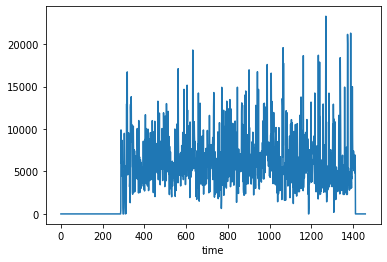

In [47]:
import pandas as pd
from matplotlib import pyplot as plt


'''tp.plot_timeseries(data, datatime, var_names)'''
array = dataframe.values
#print(type(dataframe.values))
#print(array.shape)
print('plotting time series from first dynamical system')


plt.plot(array[:,0])
plt.xlabel('time')

plt.show()



Text(0.5, 0, 'time')

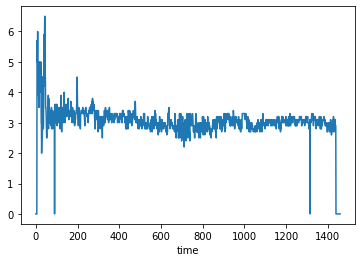

In [46]:

plt.plot(array[:,2])
plt.xlabel('time')



Text(0.5, 0, 'time')

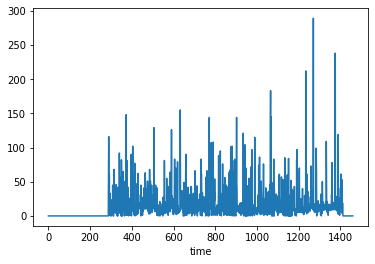

In [48]:

plt.plot(array[:,1])
plt.xlabel('time')


# Plot distributions

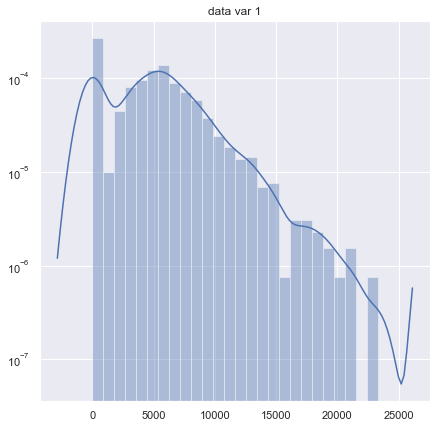

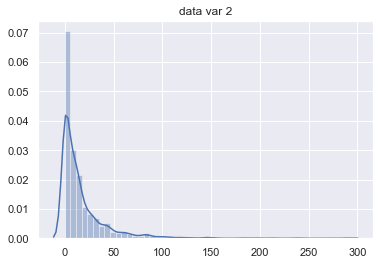

In [51]:
import seaborn as sns, numpy as np
sns.set()

f, ax = plt.subplots(figsize=(7, 7))
ax.set( yscale="log")
ax = sns.distplot(array[:,0])
plt.title('data var 1')
plt.show()


ax = sns.distplot(array[:,1])
plt.title('data var 2')
plt.show()

# Analysis of data 

In [53]:
# Imports
import numpy
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction

# setting up the parameters for the PCMCI method

parcorr = ParCorr(significance='analytic')

pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

print('pcmci variable outcome type', type(pcmci))

'''
deleted the element in pcmci method:   var_names=var_names not to get errors
'''



pcmci variable outcome type <class 'tigramite.pcmci.PCMCI'>


'\ndeleted the element in pcmci method:   var_names=var_names not to get errors\n'

In [54]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction

# setting up the parameters for the PCMCI method

parcorr = ParCorr(significance='analytic')

pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

print('pcmci variable outcome type', type(pcmci))

'''
deleted the element in pcmci method:   var_names=var_names not to get errors
'''

pcmci variable outcome type <class 'tigramite.pcmci.PCMCI'>


'\ndeleted the element in pcmci method:   var_names=var_names not to get errors\n'

In [55]:
# Correlation calculation

In [56]:
correlations = pcmci.get_lagged_dependencies(tau_max=20)



## Estimating lagged dependencies


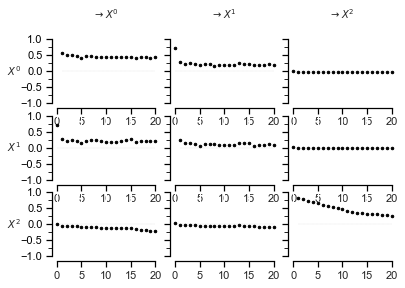

In [57]:
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5})